# Import Libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Load dataset
df = pd.read_csv("/content/Football_teams_price_data.csv")

# Display the first 5 rows of the dataframe
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,...,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,...,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628"
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,...,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388"
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,...,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729"
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,...,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894"
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,...,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631"


# EDA

In [ ]:
print("Shape of the Data:", df.shape)

Shape of the Data: (50000, 26)


In [ ]:
print("Data types:\n", df.dtypes)

Data types:
 AveragePlayerAge                float64
TotalGoalsLastSeason              int64
MatchesWonLastSeason              int64
MatchesDrawnLastSeason            int64
MatchesLostLastSeason             int64
TotalGoalsConcededLastSeason      int64
TotalRevenueLastSeason          float64
StadiumCapacity                   int64
AverageAttendance               float64
TransferSpendingLastSeason      float64
TransferIncomeLastSeason        float64
NumberOfTrophies                  int64
MarketValueOfSquad              float64
AveragePlayerMarketValue        float64
YouthAcademyRating              float64
League                           object
Country                          object
Manager                          object
TeamFormation                    object
PlayingStyle                     object
HomeCity                         object
StadiumType                      object
MainSponsor                      object
KitManufacturer                  object
OwnershipType              

In [ ]:
print("Summary stats:\n", df.describe())

Summary stats:
        AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  \
count      50000.000000          50000.000000          50000.000000   
mean          26.480678             59.343160             18.425460   
std            4.902909             23.095732             10.955441   
min           18.000094             20.000000              0.000000   
25%           22.231468             39.000000              9.000000   
50%           26.481162             59.000000             18.000000   
75%           30.721124             79.000000             28.000000   
max           34.999527             99.000000             37.000000   

       MatchesDrawnLastSeason  MatchesLostLastSeason  \
count            50000.000000           50000.000000   
mean                18.604460              18.478100   
std                 10.980261              10.996911   
min                  0.000000               0.000000   
25%                  9.000000               9.000000   
50%     

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 AveragePlayerAge                0
TotalGoalsLastSeason            0
MatchesWonLastSeason            0
MatchesDrawnLastSeason          0
MatchesLostLastSeason           0
TotalGoalsConcededLastSeason    0
TotalRevenueLastSeason          0
StadiumCapacity                 0
AverageAttendance               0
TransferSpendingLastSeason      0
TransferIncomeLastSeason        0
NumberOfTrophies                0
MarketValueOfSquad              0
AveragePlayerMarketValue        0
YouthAcademyRating              0
League                          0
Country                         0
Manager                         0
TeamFormation                   0
PlayingStyle                    0
HomeCity                        0
StadiumType                     0
MainSponsor                     0
KitManufacturer                 0
OwnershipType                   0
Price                           0
dtype: int64


In [ ]:
print("Duplicate rows:\n", df[df.duplicated()])

Duplicate rows:
 Empty DataFrame
Columns: [AveragePlayerAge, TotalGoalsLastSeason, MatchesWonLastSeason, MatchesDrawnLastSeason, MatchesLostLastSeason, TotalGoalsConcededLastSeason, TotalRevenueLastSeason, StadiumCapacity, AverageAttendance, TransferSpendingLastSeason, TransferIncomeLastSeason, NumberOfTrophies, MarketValueOfSquad, AveragePlayerMarketValue, YouthAcademyRating, League, Country, Manager, TeamFormation, PlayingStyle, HomeCity, StadiumType, MainSponsor, KitManufacturer, OwnershipType, Price]
Index: []

[0 rows x 26 columns]


In [ ]:
df.columns

Index(['AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason',
       'MatchesDrawnLastSeason', 'MatchesLostLastSeason',
       'TotalGoalsConcededLastSeason', 'TotalRevenueLastSeason',
       'StadiumCapacity', 'AverageAttendance', 'TransferSpendingLastSeason',
       'TransferIncomeLastSeason', 'NumberOfTrophies', 'MarketValueOfSquad',
       'AveragePlayerMarketValue', 'YouthAcademyRating', 'League', 'Country',
       'Manager', 'TeamFormation', 'PlayingStyle', 'HomeCity', 'StadiumType',
       'MainSponsor', 'KitManufacturer', 'OwnershipType', 'Price'],
      dtype='object')

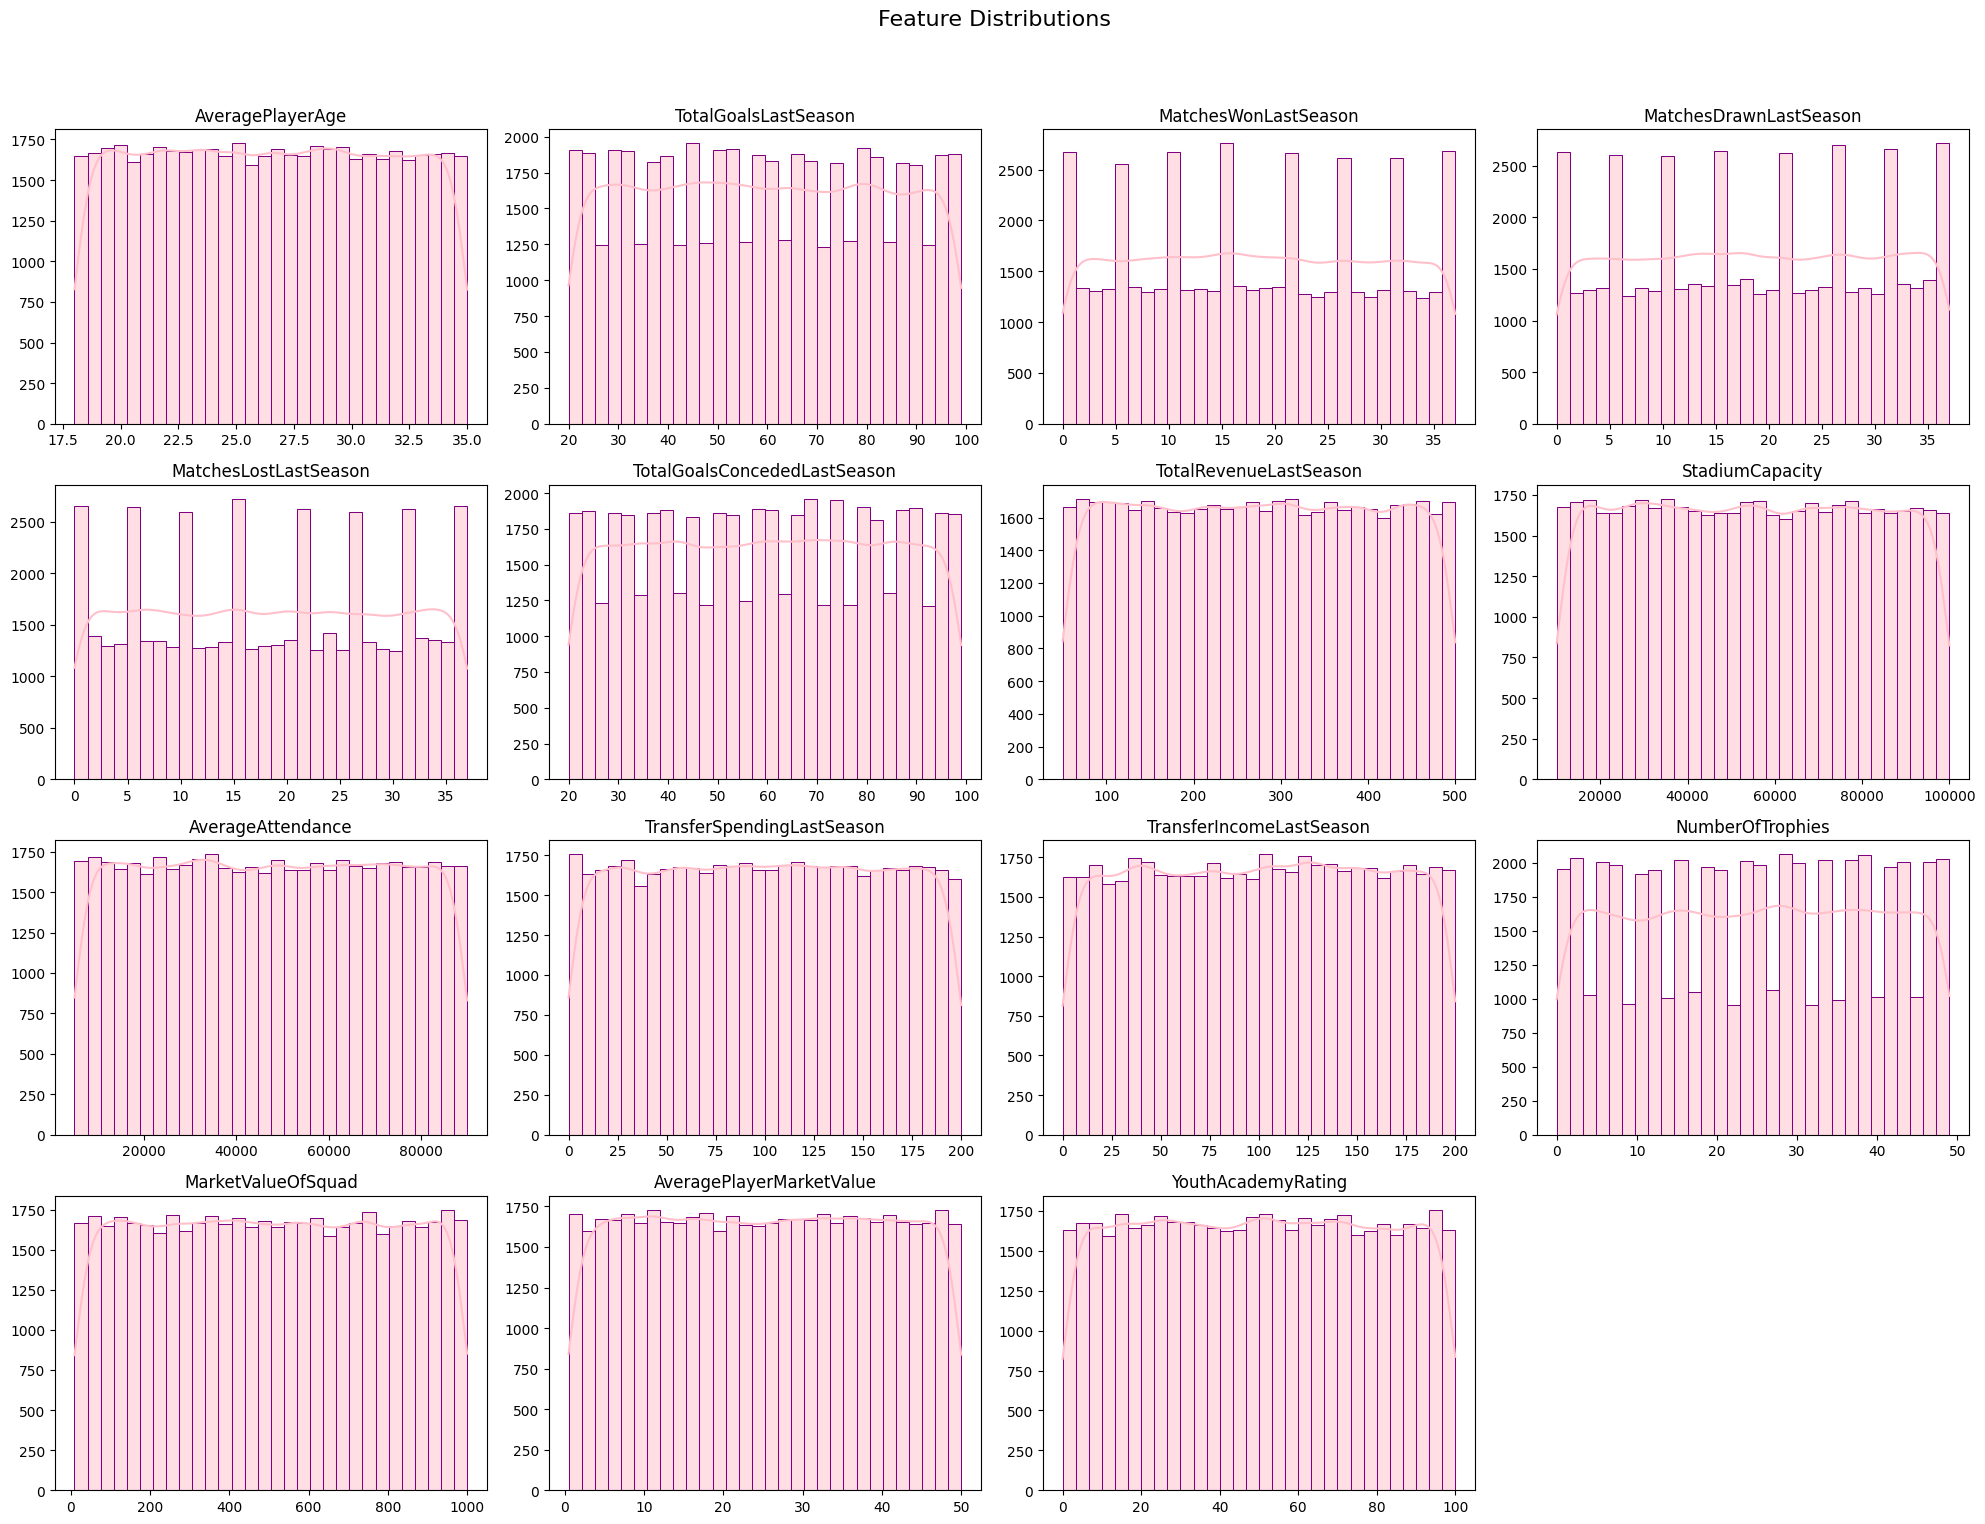

In [ ]:
# Plot histograms for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle("Feature Distributions", fontsize=16)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, color='pink', edgecolor='purple', kde=True)
    plt.title(f'{col}')
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

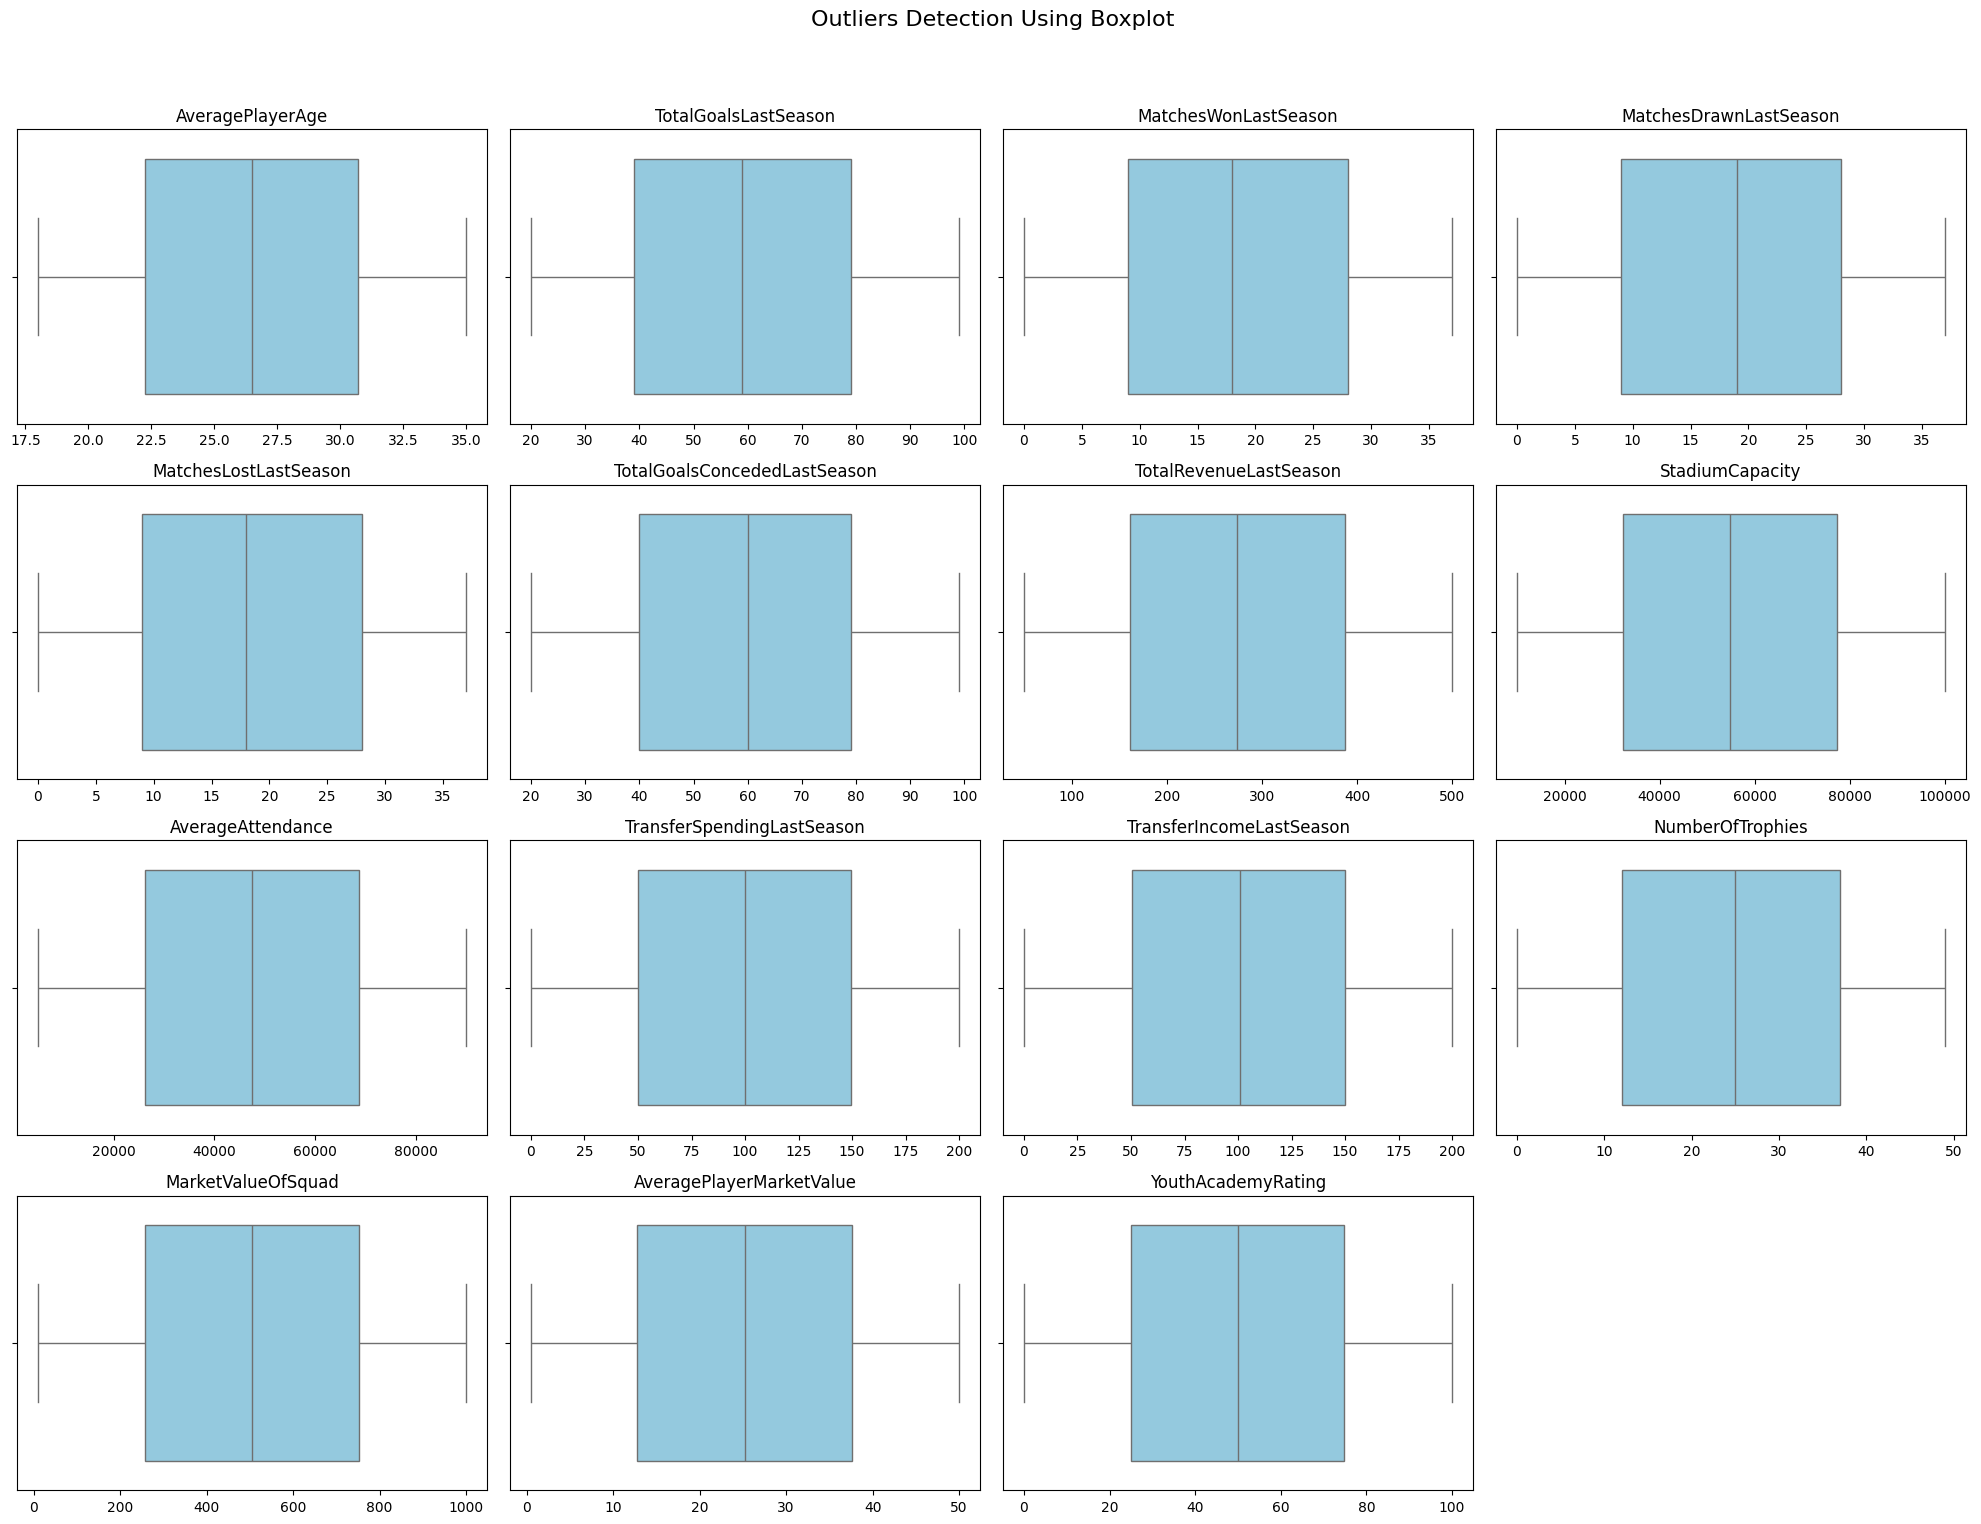

In [ ]:
# Plot boxplots to detect outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle("Outliers Detection Using Boxplot", fontsize=16)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue', flierprops=dict(markerfacecolor='red', marker='o'))
    plt.title(f'{col}')
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Fix Price column if needed
if df['Price'].dtype == 'object':
    df['Price'] = df['Price'].str.replace(',', '').astype(float)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

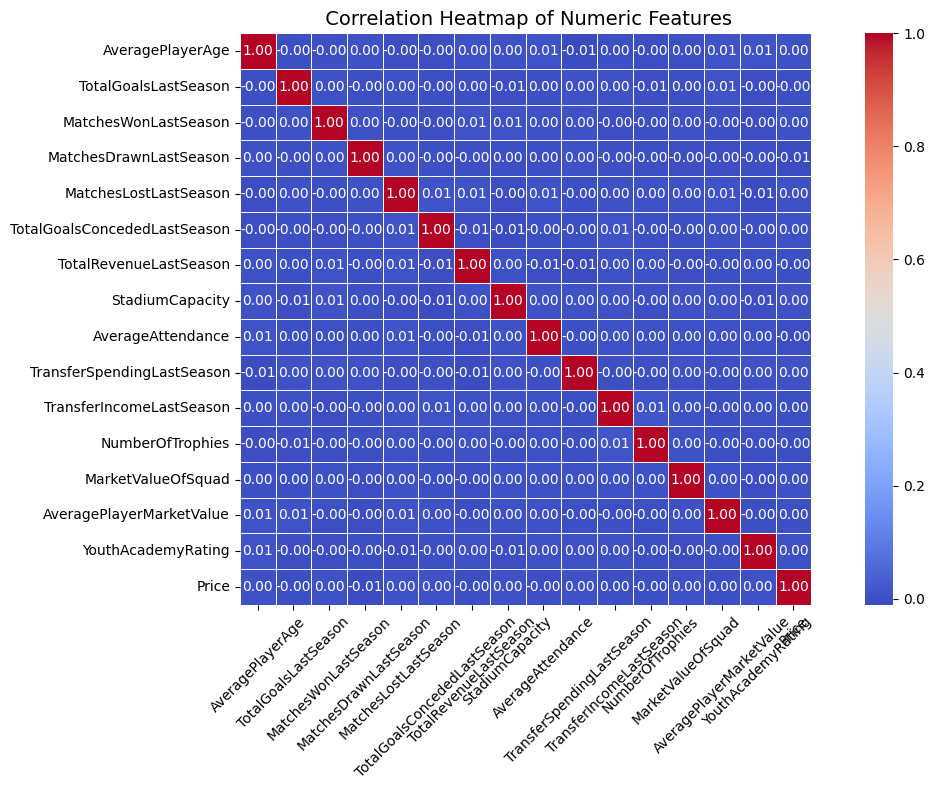

In [ ]:
# Plot correlation heatmap
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar=True)

plt.title(" Correlation Heatmap of Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Standardize selected numeric features
numerical_cols = ['AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason',
                  'AverageAttendance', 'TotalRevenueLastSeason', 'StadiumCapacity',
                  'NumberOfTrophies', 'MarketValueOfSquad']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df['Price'] = scaler.fit_transform(df[['Price']]).flatten()

# Create binary target column for classification
df['Ticket_Purchased'] = np.where(df['AverageAttendance'] > df['AverageAttendance'].median(), 1, 0)

# Select features
features = [
    'AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason',
    'AverageAttendance', 'TotalRevenueLastSeason', 'StadiumCapacity',
    'NumberOfTrophies', 'MarketValueOfSquad', 'PlayingStyle'
]

df = df[features + ['Price', 'Ticket_Purchased']]

# Encode categorical variables
categorical_features = ['PlayingStyle']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Classification Model


---


This model predicts whether a ticket is likely to be purchased (1) or not (0) based on the Average Attendance of a team.
We first created a binary target called Ticket_Purchased, where:

If a team's average attendance is above the median attendance across all teams, it's labeled 1 (indicating high interest — likely ticket purchase).

If it's equal to or below the median, it's labeled 0 (indicating lower interest).

The model learns this pattern and can classify future teams as likely to sell tickets or not, based on their attendance level.


In [ ]:
# Classification model
x_classification = df['AverageAttendance']
y_classification = df['Ticket_Purchased']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    x_classification, y_classification, test_size=0.2, random_state=42
)
xgb_class = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)
xgb_class.fit(X_train_class, y_train_class)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:15:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Model evaluation
# Classification Evaluation
y_pred_class = xgb_class.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy:.4f}')
print(classification_report(y_test_class, y_pred_class))

Classification Accuracy: 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5098
           1       1.00      1.00      1.00      4902

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
# Grid Search for classification
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_class, y_train_class)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_class)

print("\n Evaluation with Best Parameters on Test Set:")
print(f"Test Accuracy: {accuracy_score(y_test_class, y_pred_best):.4f}")
print(classification_report(y_test_class, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9987999962485938

 Evaluation with Best Parameters on Test Set:
Test Accuracy: 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5098
           1       1.00      1.00      1.00      4902

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Regression Model


---


This model predicts the Price of a football club using various features such as:
Average Player Age, Goals, Market Value, Attendance, Stadium Capacity, and more.
The output is a continuous numeric value representing the estimated price of the club.
It helps in assessing the financial value of a team based on performance and structure.

In [ ]:
# Regression Model
x_regression = df[['AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason',
                   'AverageAttendance', 'TotalRevenueLastSeason', 'StadiumCapacity',
                   'NumberOfTrophies', 'MarketValueOfSquad', 'PlayingStyle']]

y_regression = df['Price']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    x_regression, y_regression, test_size=0.2, random_state=42
)

xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)
xgb_reg.fit(X_train_reg,y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Model evaluation
# Regression Evaluation
y_pred_reg = xgb_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Regression Mean Squared Error: {mse:.2f}')

Regression Mean Squared Error: 1.01


In [ ]:
# Grid Search for regression
reg_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_reg_base = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

grid_search_reg = GridSearchCV(
    estimator=xgb_reg_base,
    param_grid=reg_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_reg.fit(X_train_reg, y_train_reg)

print("Best Parameters for Regressor:", grid_search_reg.best_params_)
print("Best CV Score (Negative MSE):", grid_search_reg.best_score_)

best_reg_model = grid_search_reg.best_estimator_
y_pred_best_reg = best_reg_model.predict(X_test_reg)
mse_best = mean_squared_error(y_test_reg, y_pred_best_reg)
print(f"Test MSE using Best Parameters: {mse_best:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Regressor: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best CV Score (Negative MSE): -1.0000816424533001
Test MSE using Best Parameters: 1.0009


# Clustering and supervised learning using cluster labels


---

his model is designed to support personalized offers for fans based on team characteristics.

First, we use KMeans clustering to group teams into 3 clusters based on their features, such as:
Average player age, goals, trophies, market value, attendance, and more.

Then, we train a supervised learning model to predict which cluster a new team belongs to.

The purpose of this model is to identify the type of team so we can deliver tailored marketing offers to their fans.
For example:

*   High-attendance, high-value teams might receive premium or exclusive offers.
*   Lower-attendance teams might get promotional or incentive-based campaigns.

This approach helps create smarter, audience-focused engagement strategies.

In [ ]:
# Clustering and supervised learning using cluster labels
clustering_features = [
    'AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason',
    'AverageAttendance', 'TotalRevenueLastSeason', 'StadiumCapacity',
    'NumberOfTrophies', 'MarketValueOfSquad', 'PlayingStyle'
]

X_clustering = df[clustering_features]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Label'] = kmeans.fit_predict(X_clustering)

X_supervised = X_clustering
y_supervised = df['Cluster_Label']

X_train_sup, X_test_sup, y_train_sup, y_test_sup = train_test_split(
    X_supervised, y_supervised, test_size=0.2, random_state=42
)


xgb_cluster_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_cluster_model.fit(X_train_sup, y_train_sup)

y_pred_sup = xgb_cluster_model.predict(X_test_sup)
print(classification_report(y_test_sup, y_pred_sup))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4305
           1       0.99      0.99      0.99      2925
           2       0.99      0.99      0.99      2770

    accuracy                           1.00     10000
   macro avg       0.99      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Cluster-Based Marketing Strategy:**
---
**Cluster 0: High-attendance, loyal fanbase teams**
Teams with strong and consistent crowd attendance.

Fans are already highly engaged.

Recommended offers:
-VIP memberships and season ticket bundles.

-Exclusive access to player meet & greet events.

-Discounts on official team merchandise.

-Early access to ticket sales and priority seating.


---

**Cluster 1: Mid-tier teams with moderate attendance**

Teams with average market value and fluctuating fan interest.

Fans are present but need stronger incentives.

Recommended offers:

-Buy-one-get-one-free (BOGO) ticket promotions.

-Loyalty programs (points for attendance).

-Collaborations with influencers or local content creators.

-Coupons for food, beverages, or partner stores during matches.


---

**Cluster 2: High-value teams with low attendance**
Teams with strong financial value but weak audience engagement.

Fans exist but are inactive or less connected.

Recommended offers:

-Ticket discounts or free giveaways (scarves, caps, etc.).

=Social media contests to drive engagement.

-Fun pre-game experiences or matchday events.

-Targeted ads or personalized campaigns to attract attention.


# Final linked model output

In [ ]:
# Final linked model output

df['Predicted_Ticket'] = xgb_class.predict(df[['AverageAttendance']])
df['Predicted_Price'] = xgb_reg.predict(df[clustering_features])
df['Predicted_Cluster'] = xgb_cluster_model.predict(df[clustering_features])

final_df = df[['AveragePlayerAge', 'AverageAttendance', 'MarketValueOfSquad',
               'Predicted_Ticket', 'Predicted_Price', 'Cluster_Label', 'Predicted_Cluster']]

print("Final Linked Model Output:")
print(final_df.head())

Final Linked Model Output:
   AveragePlayerAge  AverageAttendance  MarketValueOfSquad  Predicted_Ticket  \
0         -0.431074          -1.716775            0.729089                 0   
1          1.566732          -0.050962           -0.937124                 0   
2          0.808348           1.257566           -0.330234                 1   
3          0.346026           0.514888           -1.143367                 1   
4         -1.188768          -1.484408            0.199004                 0   

   Predicted_Price  Cluster_Label  Predicted_Cluster  
0         0.361227              2                  2  
1         0.026158              1                  1  
2        -0.030094              1                  1  
3         0.051882              1                  1  
4        -0.008846              2                  2  


Example Interpretation – Row 0
This row represents one football team with the following characteristics and predictions:


---


AveragePlayerAge: -0.431 → The team's average player age is slightly below average, indicating a relatively younger squad.

AverageAttendance: -1.717 → This team has very low crowd attendance, significantly below the league average.

MarketValueOfSquad: 0.729 → Despite the low attendance, the team's market value is relatively high, which could mean it’s a strong or well-funded team.


---


Model Predictions for this Team:
Predicted_Ticket = 0:
The classification model predicts that fans are not likely to purchase tickets for this team.

Predicted_Price = 0.361:
The regression model estimates a moderately high team value (after scaling).

Cluster_Label = 2 / Predicted_Cluster = 2:
Both clustering models (unsupervised and supervised) assigned this team to Cluster 2, which includes teams that are:

High in market value.

But suffer from low attendance and low fan engagement.


---


Suggested Strategy for this Team (Cluster 2):
To increase ticket sales and build a stronger fanbase, the club should focus on:

Promotions and discounts on tickets.

Engaging content on social media.

Free merchandise giveaways.

Creating an exciting matchday experience to attract new fans.

